# EDA

In [7]:
import sys
import os
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re

In [8]:
sys.path.append(os.path.abspath('../source'))

from connection_mysql import get_sqlalchemy_engine

conexion = get_sqlalchemy_engine()

Conexión a la base de datos exitosa.


In [9]:
df = pd.read_sql_query("SELECT * FROM raw_candidates", conexion)
print(df.head())

   First Name   Last Name                      Email Application Date  \
0  Bernadette   Langworth        leonard91@yahoo.com       2021-02-26   
1      Camryn    Reynolds        zelda56@hotmail.com       2021-09-09   
2       Larue      Spinka   okey_schultz41@gmail.com       2020-04-14   
3        Arch      Spinka     elvera_kulas@yahoo.com       2020-10-01   
4       Larue  Altenwerth  minnie.gislason@gmail.com       2020-05-20   

   Country  YOE  Seniority                         Technology  \
0   Norway    2     Intern                      Data Engineer   
1   Panama   10     Intern                      Data Engineer   
2  Belarus    4  Mid-Level                     Client Success   
3  Eritrea   25    Trainee                          QA Manual   
4  Myanmar   13  Mid-Level  Social Media Community Management   

   Code Challenge Score  Technical Interview Score  
0                     3                          3  
1                     2                         10  
2          

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   First Name                 50000 non-null  object
 1   Last Name                  50000 non-null  object
 2   Email                      50000 non-null  object
 3   Application Date           50000 non-null  object
 4   Country                    50000 non-null  object
 5   YOE                        50000 non-null  int64 
 6   Seniority                  50000 non-null  object
 7   Technology                 50000 non-null  object
 8   Code Challenge Score       50000 non-null  int64 
 9   Technical Interview Score  50000 non-null  int64 
dtypes: int64(3), object(7)
memory usage: 3.8+ MB


In [11]:
null_values= df.isnull().sum()
print("Valores nulos:\n", null_values)

Valores nulos:
 First Name                   0
Last Name                    0
Email                        0
Application Date             0
Country                      0
YOE                          0
Seniority                    0
Technology                   0
Code Challenge Score         0
Technical Interview Score    0
dtype: int64


In [12]:
duplicate_values= df[df.duplicated(keep=False)]
print("Datos duplicados:\n", duplicate_values)

Datos duplicados:
 Empty DataFrame
Columns: [First Name, Last Name, Email, Application Date, Country, YOE, Seniority, Technology, Code Challenge Score, Technical Interview Score]
Index: []


In [13]:
for col in df.columns:
    print(f"Valores duplicados en '{col}':")
    print(df[col].value_counts()[df[col].value_counts() > 1])
    print("-" * 40)

Valores duplicados en 'First Name':
First Name
Sarai        33
Elyse        32
Anabel       31
Eva          31
Nayeli       30
             ..
Janis         6
Jaydon        6
Paul          5
Antonetta     5
Gudrun        5
Name: count, Length: 3007, dtype: int64
----------------------------------------
Valores duplicados en 'Last Name':
Last Name
Murazik       138
Nitzsche      134
Harvey        133
Metz          133
Lang          133
             ... 
Rutherford     83
Howe           82
White          79
McClure        78
Bechtelar      76
Name: count, Length: 474, dtype: int64
----------------------------------------
Valores duplicados en 'Email':
Email
marianne31@yahoo.com        3
fern70@gmail.com            3
isaiah24@yahoo.com          2
missouri65@yahoo.com        2
kelton91@hotmail.com        2
                           ..
marjolaine91@hotmail.com    2
jazmin54@gmail.com          2
reyna2@hotmail.com          2
kasandra68@hotmail.com      2
easter75@gmail.com          2
Name: 

In [14]:
duplicated_personal_data= df[df.duplicated(subset=['Email', 'First Name', 'Last Name'], keep=False)]
print("Datos Personales Duplicados:\n", duplicated_personal_data)

Datos Personales Duplicados:
 Empty DataFrame
Columns: [First Name, Last Name, Email, Application Date, Country, YOE, Seniority, Technology, Code Challenge Score, Technical Interview Score]
Index: []


In [15]:

# Expresión regular para validar correos electrónicos
email_regex = r"^[a-zA-Z0-9._%+-]+@[a-zA-Z0-9.-]+\.[a-zA-Z]{2,}$"

# Filtrar los correos inválidos sin modificar el DataFrame
invalid_emails = df.loc[~df["Email"].str.match(email_regex), "Email"]

# Mostrar la cantidad y algunos ejemplos de correos inválidos
print(f"Correos inválidos encontrados: {len(invalid_emails)}")
print(invalid_emails.head(10)) 

Correos inválidos encontrados: 0
Series([], Name: Email, dtype: object)


In [16]:
df.describe()


,YOE,Code Challenge Score,Technical Interview Score
count,50000.000000,50000.000000,50000.000000
mean,15.286980,4.996400,5.003880
std,8.830652,3.166896,3.165082
min,0.000000,0.000000,0.000000
25%,8.000000,2.000000,2.000000
50%,15.000000,5.000000,5.000000
75%,23.000000,8.000000,8.000000
max,30.000000,10.000000,10.000000


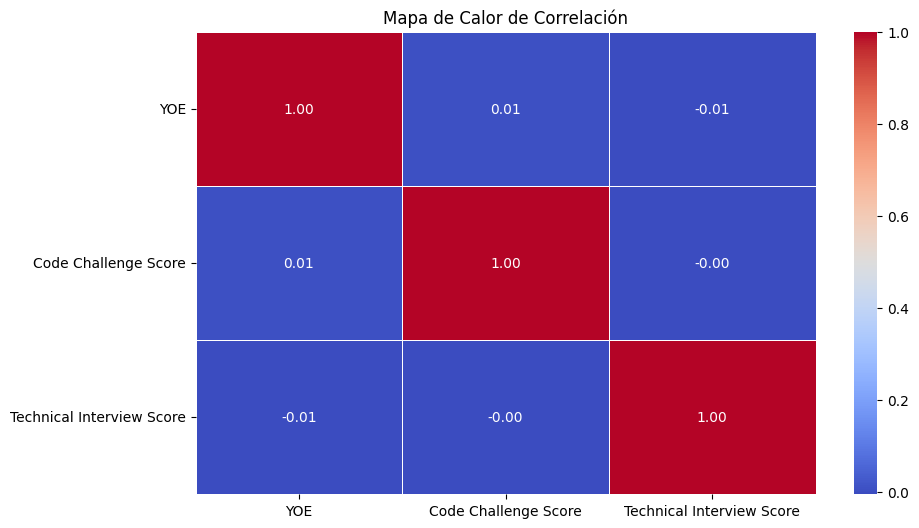

In [17]:
df_numeric = df.select_dtypes(include=['number'])

corr_matrix = df_numeric.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Mapa de Calor de Correlación")
plt.show()


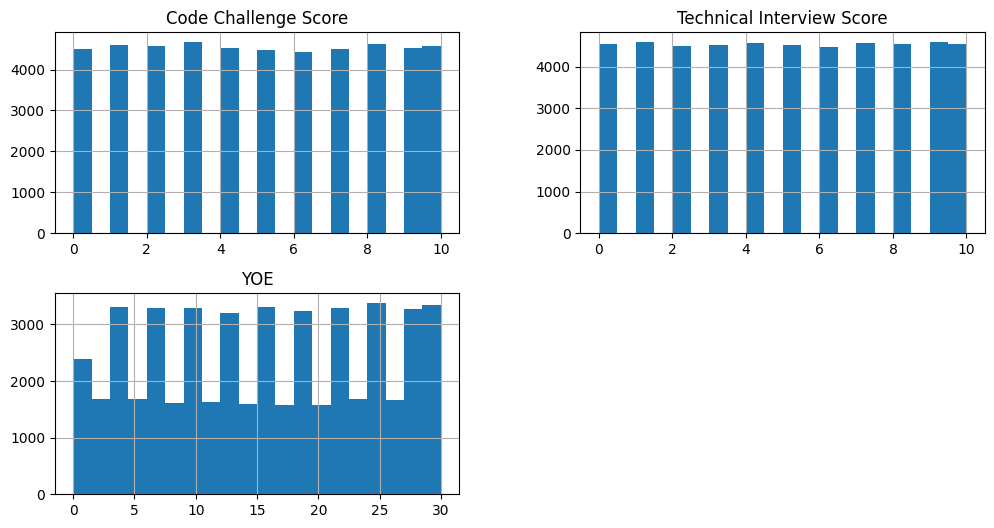

In [18]:
# Histograma de los puntajes
df[['Code Challenge Score', 'Technical Interview Score', 'YOE']].hist(figsize=(12, 6), bins=20)
plt.show()

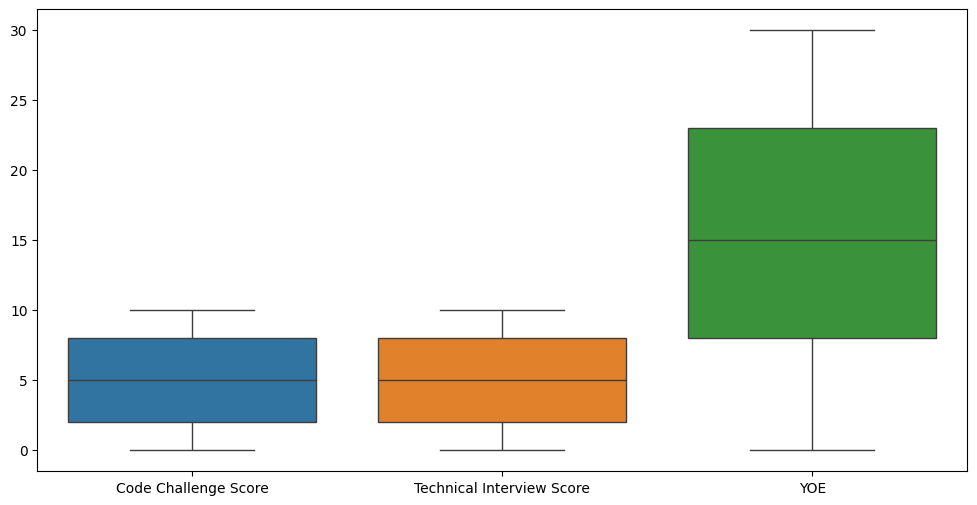

In [19]:
# Boxplot para detectar valores atípicos en los puntajes y experiencia
plt.figure(figsize=(12,6))
sns.boxplot(data=df[['Code Challenge Score', 'Technical Interview Score', 'YOE']])
plt.show()


In [20]:
# Definir una máscara booleana para los candidatos contratados
hired= (df["Code Challenge Score"] >= 7) & (df["Technical Interview Score"] >= 7)

# Obtener conteo de contratados y no contratados sin modificar el DataFrame
hired_count = hired.sum()
not_hired_count = (~hired).sum()

print("Empleados contratados:\n", hired_count)
print("Empleados no contratados:\n", not_hired_count)

Empleados contratados:
 6698
Empleados no contratados:
 43302


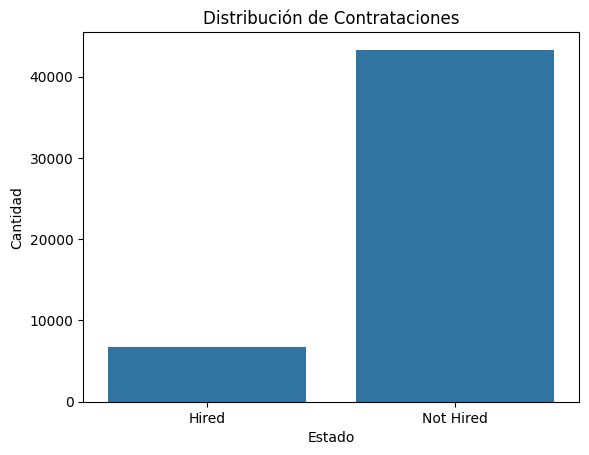

In [21]:
sns.barplot(x=["Hired", "Not Hired"], y=[hired_count, not_hired_count])
plt.title("Distribución de Contrataciones")
plt.xlabel("Estado")
plt.ylabel("Cantidad")
plt.show()

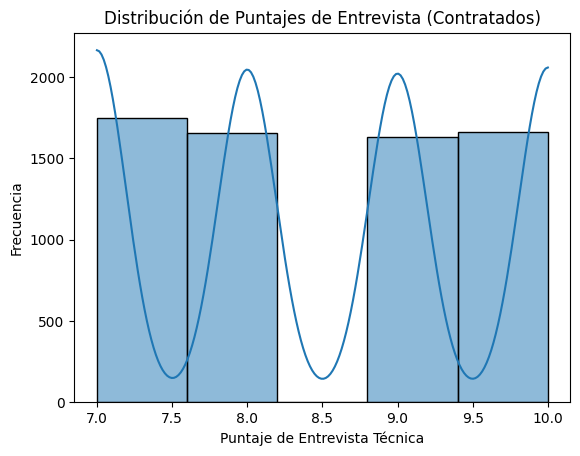

In [22]:
sns.histplot(df[hired]["Technical Interview Score"], bins=5, kde=True)
plt.title("Distribución de Puntajes de Entrevista (Contratados)")
plt.xlabel("Puntaje de Entrevista Técnica")
plt.ylabel("Frecuencia")
plt.show()

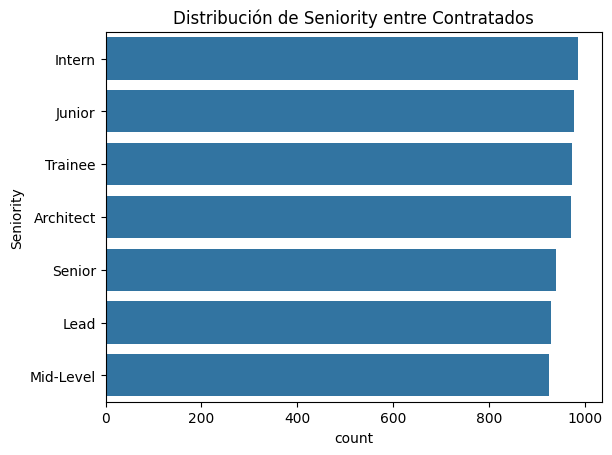

In [23]:
# Contar contratados por nivel de seniority
seniority_counts = df[hired]["Seniority"].value_counts()
# Visualizar cuántos candidatos hay por nivel de seniority entre los contratados
sns.countplot(data=df[hired], y="Seniority", order=seniority_counts.index)
plt.title("Distribución de Seniority entre Contratados")
plt.show()




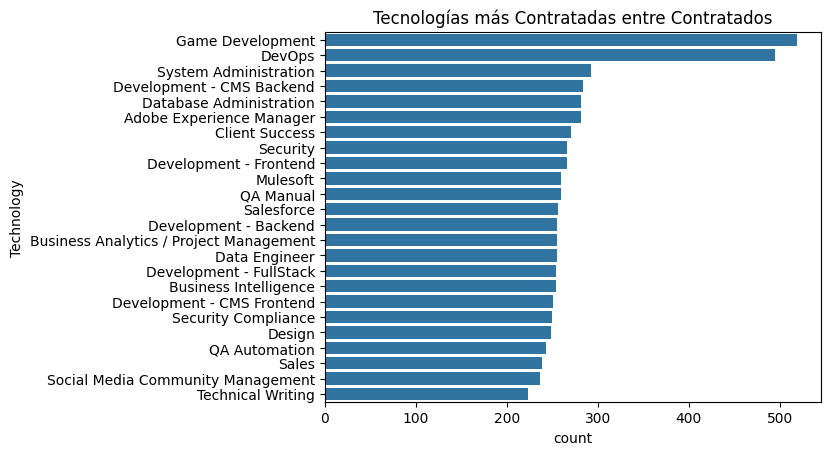

In [24]:
# Contar contratados por tecnología
technology_counts = df[hired]["Technology"].value_counts()
# Tecnologías más comunes entre contratados
sns.countplot(data=df[hired], y="Technology", order=technology_counts.index)
plt.title("Tecnologías más Contratadas entre Contratados")
plt.show()

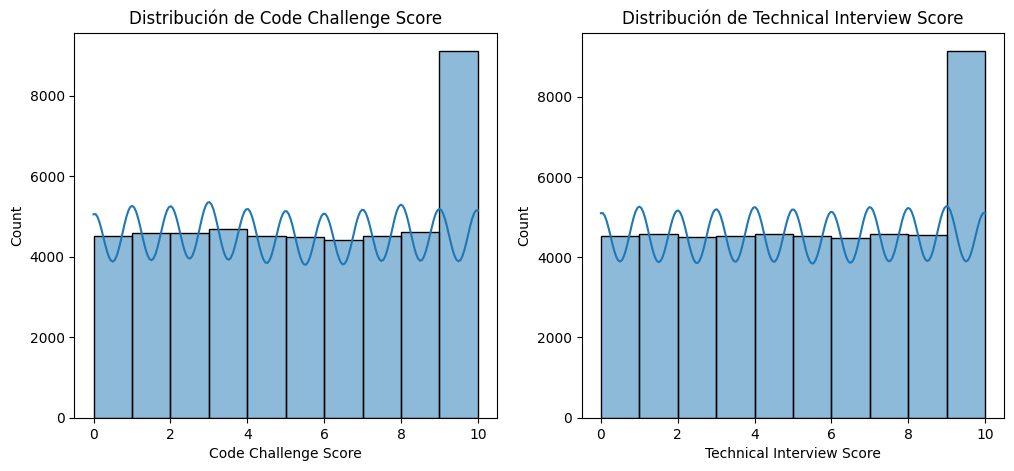

In [26]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(df["Code Challenge Score"], bins=10, kde=True, ax=axes[0])
axes[0].set_title("Distribución de Code Challenge Score")

sns.histplot(df["Technical Interview Score"], bins=10, kde=True, ax=axes[1])
axes[1].set_title("Distribución de Technical Interview Score")

plt.show()


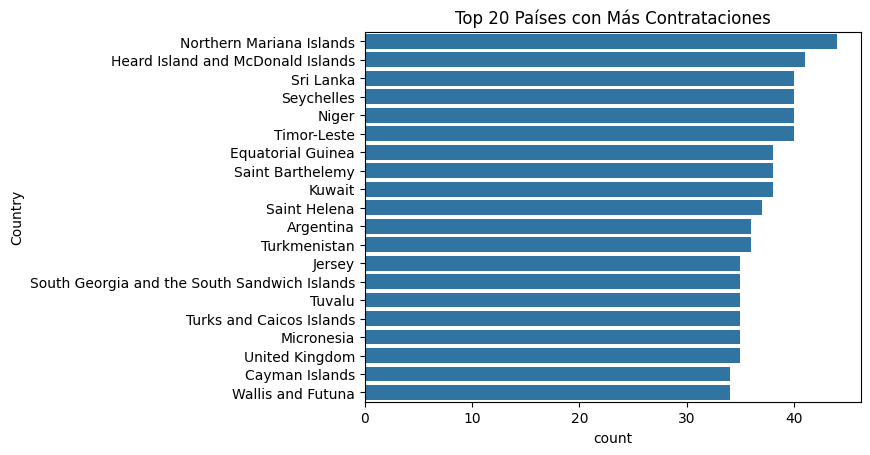

In [27]:
# Conteo de contrataciones por país
hired_by_country = df[hired]["Country"].value_counts().head(20)

sns.countplot(data=df[hired], y="Country", order=hired_by_country.index)
plt.title("Top 20 Países con Más Contrataciones")
plt.show()


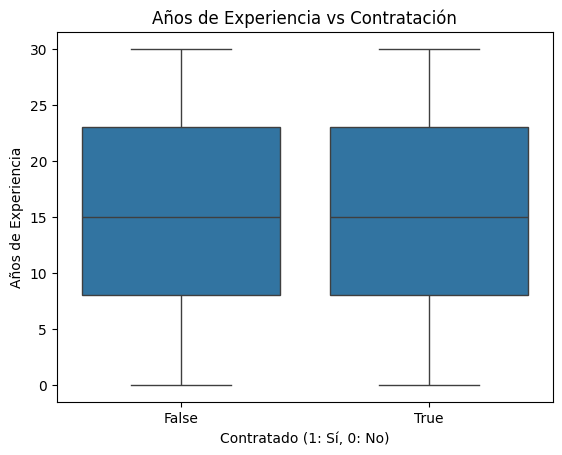

In [28]:
sns.boxplot(data=df, x=hired, y="YOE")
plt.title("Años de Experiencia vs Contratación")
plt.xlabel("Contratado (1: Sí, 0: No)")
plt.ylabel("Años de Experiencia")
plt.show()


In [31]:
df["Application Year"] = pd.to_datetime(df["Application Date"]).dt.year

# Conteo de contrataciones por año
hired_by_year = df[hired]["Application Year"].value_counts().sort_index()

print("Contrataciones por año:")
print(hired_by_year)


Contrataciones por año:
Application Year
2018    1409
2019    1524
2020    1485
2021    1485
2022     795
Name: count, dtype: int64
